# Task1

In [2]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings("ignore")

In [2]:
#random regression problem
x,y=make_regression(n_samples=100,noise=4,bias=100,n_features=1,random_state=30)

In [3]:
x[:5]

array([[ 1.00256029],
       [-0.77518851],
       [ 0.34346298],
       [ 0.57509771],
       [-0.4230153 ]])

In [4]:
y[:5]

array([119.89732985,  77.26440703,  99.96390614, 109.47905029,
        94.26272713])

In [5]:
x.shape

(100, 1)

In [6]:
y.shape

(100,)

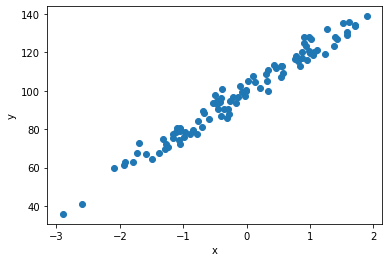

In [7]:
#scatter plot of target and single feature
plt.scatter(x,y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [8]:
#train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=30)

In [9]:
model=LinearRegression().fit(x_train,y_train)

In [10]:
cod1=model.score(x_train,y_train)
cod1

0.9758642038994575

In [11]:
y_pred=model.predict(x_test)

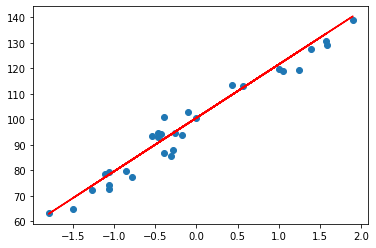

In [12]:
plt.scatter(x_test,y_test)
plt.plot(x_test,y_pred,color="red")

In [13]:
#model metrics
mse1=mean_squared_error(y_test,y_pred)
rmse1=np.sqrt(mse1)
mse1,rmse1

(18.130626227551943, 4.258007307127589)

# Task2

In [14]:
#adding some outliers to our data

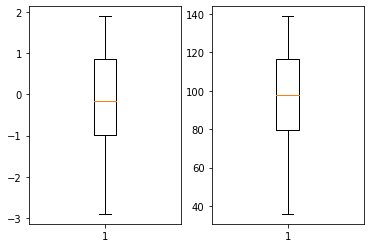

In [15]:
plt.subplot(121)
plt.boxplot(x)
plt.subplot(122)
plt.boxplot(y)
plt.show()

In [16]:
x1=np.random.normal(0,0.5,size=(5,1))
x1=x1+x1.max()/4
x1

array([[ 0.49906719],
       [ 0.64790405],
       [-0.57378529],
       [ 0.01222346],
       [ 0.51041769]])

In [17]:
x_outliers=np.append(x,x1)
x_outliers=x_outliers.reshape(-1,1)
x_outliers.shape

(105, 1)

In [18]:
y1=np.random.normal(100,10,size=(5,1))
y1=y1+y1.max()/4
y1

array([[129.52551015],
       [133.71800596],
       [147.85930561],
       [140.63588589],
       [119.34108463]])

In [19]:
y_outliers=np.append(y,y1)
y_outliers.shape

(105,)

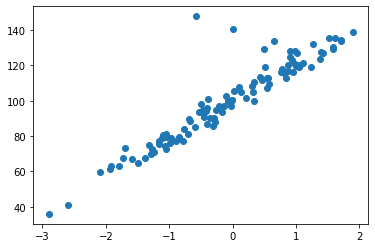

In [20]:
plt.scatter(x_outliers,y_outliers)

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x_outliers,y_outliers,test_size=0.3,random_state=30)
model=LinearRegression().fit(x_train,y_train)
y_pred=model.predict(x_test)
cod2=model.score(x_train,y_train)
cod2

0.8515107819773403

In [22]:
#model metrics
mse2=mean_squared_error(y_test,y_pred)
rmse2=np.sqrt(mse2)
mse2,rmse2

(21.36239722661719, 4.621947341393797)

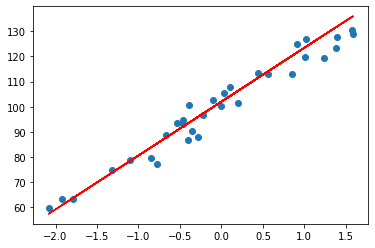

In [23]:
plt.scatter(x_test,y_test)
plt.plot(x_test,y_pred,color="red")

In [24]:
pd.DataFrame({"without outliers":[cod1,mse1,rmse1],"with outliers":[cod2,mse2,rmse2]},columns=["without outliers","with outliers"],index=["R^2","MSE","RMSE"])

,without outliers,with outliers
R^2,0.975864,0.851511
MSE,18.130626,21.362397
RMSE,4.258007,4.621947


In [25]:
# When we added outliers to our data , model accuracy decreased and error increased

# Communities data set

### Task3

In [3]:
df=pd.read_csv("DS2_C5_S2_Communities_Data_Challenge.data")
#last column is target

In [4]:
df.head()

,8,?,?.1,Lakewoodcity,1,0.19,0.33,0.02,0.9,0.12,...,0.12.2,0.26.1,0.2.1,0.06.3,0.04.2,0.9.1,0.5.2,0.32.2,0.14.3,0.2.2
0,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.0,?,0.67
1,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.0,?,0.43
2,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.0,?,0.12
3,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.0,?,0.03
4,6,?,?,SouthPasadenacity,1,0.02,0.28,0.06,0.54,1.00,...,0.01,0.58,0.10,?,?,?,?,0.0,?,0.14


In [28]:
df.shape

(1993, 128)

In [5]:
#removing first five columns
df.drop(df.columns[0:5],inplace=True,axis=1)

In [30]:
df.shape

(1993, 123)

In [31]:
pd.value_counts(df.values.ravel())["?"]

36851

In [6]:
#replacing ? with nan and then dropping columns which contains nan
df.replace("?",np.NAN,inplace=True)

In [7]:
#rows with null values
df[df.isnull().any(axis=1)]

,0.19,0.33,0.02,0.9,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12.2,0.26.1,0.2.1,0.06.3,0.04.2,0.9.1,0.5.2,0.32.2,0.14.3,0.2.2
0,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.0,NaN,0.67
1,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.0,NaN,0.43
2,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.0,NaN,0.12
3,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.0,NaN,0.03
4,0.02,0.28,0.06,0.54,1.00,0.25,0.31,0.48,0.27,0.37,...,0.01,0.58,0.10,NaN,NaN,NaN,NaN,0.0,NaN,0.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1985,0.05,0.52,0.02,0.97,0.04,0.02,0.40,0.43,0.29,0.39,...,0.10,0.09,0.03,NaN,NaN,NaN,NaN,0.0,NaN,0.02
1986,0.01,0.65,0.00,1.00,0.01,0.01,0.40,0.44,0.25,0.36,...,0.16,0.02,0.02,NaN,NaN,NaN,NaN,0.0,NaN,0.04
1987,0.02,0.41,1.00,0.21,0.02,0.01,0.54,0.57,0.43,0.45,...,0.03,0.17,0.02,NaN,NaN,NaN,NaN,0.0,NaN,0.19
1988,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,0.35,0.30,...,0.01,0.28,0.05,NaN,NaN,NaN,NaN,0.0,NaN,0.09


In [8]:
#columns wise null values
df.isnull().sum()

0.19         0
0.33         0
0.02         0
0.9          0
0.12         0
          ... 
0.9.1     1675
0.5.2     1675
0.32.2       0
0.14.3    1675
0.2.2        0
Length: 123, dtype: int64

In [33]:
#deleting columns with null values
df.dropna(axis=1,inplace=True)

In [34]:
df.shape

(1993, 100)

In [35]:
df

,0.19,0.33,0.02,0.9,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12.1,0.42,0.5.1,0.51.1,0.64,0.12.2,0.26.1,0.2.1,0.32.2,0.2.2
0,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.00,0.67
1,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.00,0.43
2,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.00,0.12
3,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.00,0.03
4,0.02,0.28,0.06,0.54,1.00,0.25,0.31,0.48,0.27,0.37,...,0.70,0.42,0.49,0.73,0.64,0.01,0.58,0.10,0.00,0.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1988,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,0.35,0.30,...,0.22,0.28,0.34,0.48,0.39,0.01,0.28,0.05,0.00,0.09
1989,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,0.73,0.14,...,0.53,0.25,0.17,0.10,0.00,0.02,0.37,0.20,0.00,0.45
1990,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,0.31,0.54,...,0.25,0.68,0.61,0.79,0.76,0.08,0.32,0.18,0.91,0.23
1991,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,0.63,0.41,...,0.45,0.64,0.54,0.59,0.52,0.03,0.38,0.33,0.22,0.19


In [36]:
#target variable y is last column
y=df.iloc[:,-1]
x=df.iloc[:,0:-1]

In [37]:
#train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=30)

In [38]:
model=LinearRegression().fit(x_train,y_train)

In [39]:
#coefficient of determination
model.score(x_train,y_train)

0.6982075411611841

In [40]:
#slope
c=model.coef_

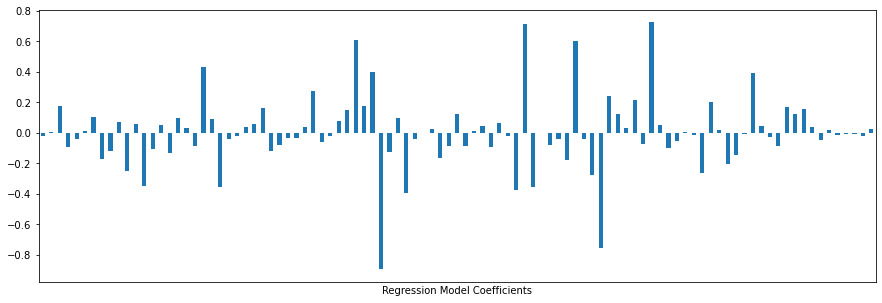

In [41]:
#visualizaing all coefficints
def plot_coef (model, ax=None):
    plt.figure(figsize=(15,5)) 
    df_coeff = pd. Series (c, index=x.columns) 
    ax = df_coeff.plot.bar(ax=ax)
    ax.set_xticks([]) 
    ax.set_xlabel('Regression Model Coefficients')
plot_coef(model)

In [42]:
#intercept
model.intercept_

0.43618289641775054

### Task4

In [43]:
y_pred=model.predict(x_test)

In [44]:
pd.DataFrame({"actual":y_test,"predicted":y_pred},columns=["actual","predicted"])

,actual,predicted
1346,0.06,0.025538
1714,0.08,0.168395
1795,0.19,0.217683
508,0.04,0.152934
973,0.17,0.077880
...,...,...
1477,0.06,0.061699
704,0.29,0.124805
1739,0.01,0.069506
1988,0.09,0.118368


In [46]:
#some y_predicted values are not near regression line,hence our model accuracy is also not best i.e 0.698

In [47]:
#mean squared error
mse=mean_squared_error(y_test,y_pred)
mse

0.018253931722639068

In [48]:
#mean absolute error
mean_absolute_error(y_test,y_pred)

0.09688357849413369

In [49]:
#root mean squared error
np.sqrt(mse)

0.13510711203574394

In [67]:
index=[*range(len(y_test[:100]))]

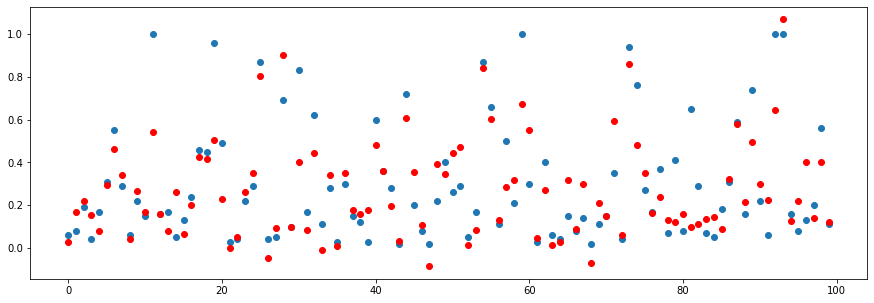

In [68]:
#visualiizing only first 100 y test vs predicted
plt.figure(figsize=(15,5))
plt.scatter(index,y_test[:100])
plt.scatter(index,y_pred[:100],color="red")

In [ ]:
#there is significant difference in y pred and actual so model accuracy is also not great